In [17]:
import numpy as np
import pandas as pd

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
#for modelling, predictions
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Load dataset

#check dataset type
print(type(load_iris()))
#view list of attributes 
print(dir(load_iris()))

#save dataset to 'irisdataset'
irisdataset = load_iris()

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [18]:
# Examine (overall/entire) dataset
print(irisdataset.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [19]:
# Examine, summarize data
print(irisdataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
# Examine, summarize data

##print(irisdataset.feature_names[0]) #prints first feature name - 'sepal length (cm)'

#print all feature names from array
for featurename in irisdataset.feature_names:
    print(featurename)

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


In [21]:
#print all target names from array
for targetname in irisdataset.target_names:
    print(targetname)

setosa
versicolor
virginica


<class 'pandas.core.frame.DataFrame'>


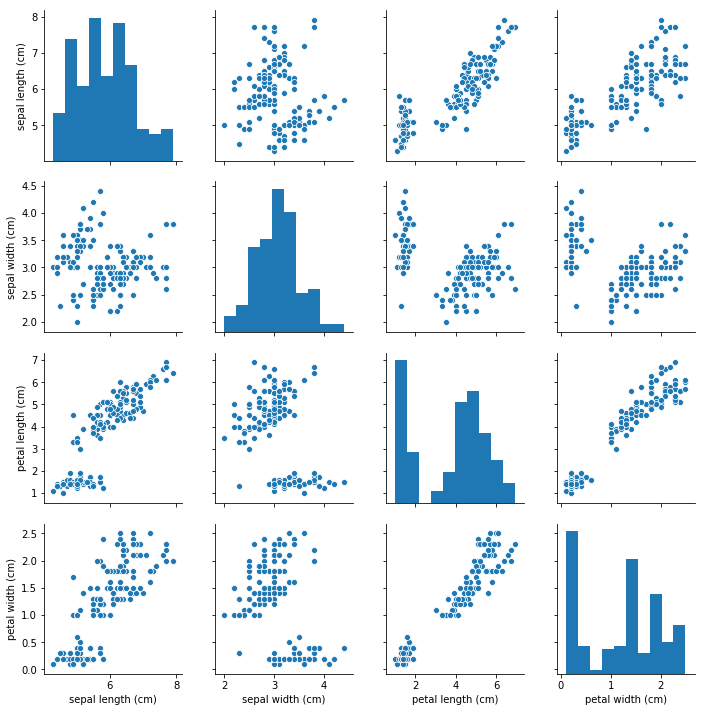

In [22]:
# convert data from 'sklearn.utils.Bunch' object to a pandas DataFrame - req'd in order to use seaborn (below)
data1 = pd.DataFrame(data = np.c_[irisdataset['data']],
                 columns = irisdataset['feature_names'])

#check dataset type
print(type(data1))

# Visualize the data - using pairplots (before doing any supervised learning)
sns.pairplot(data1)
plt.show()

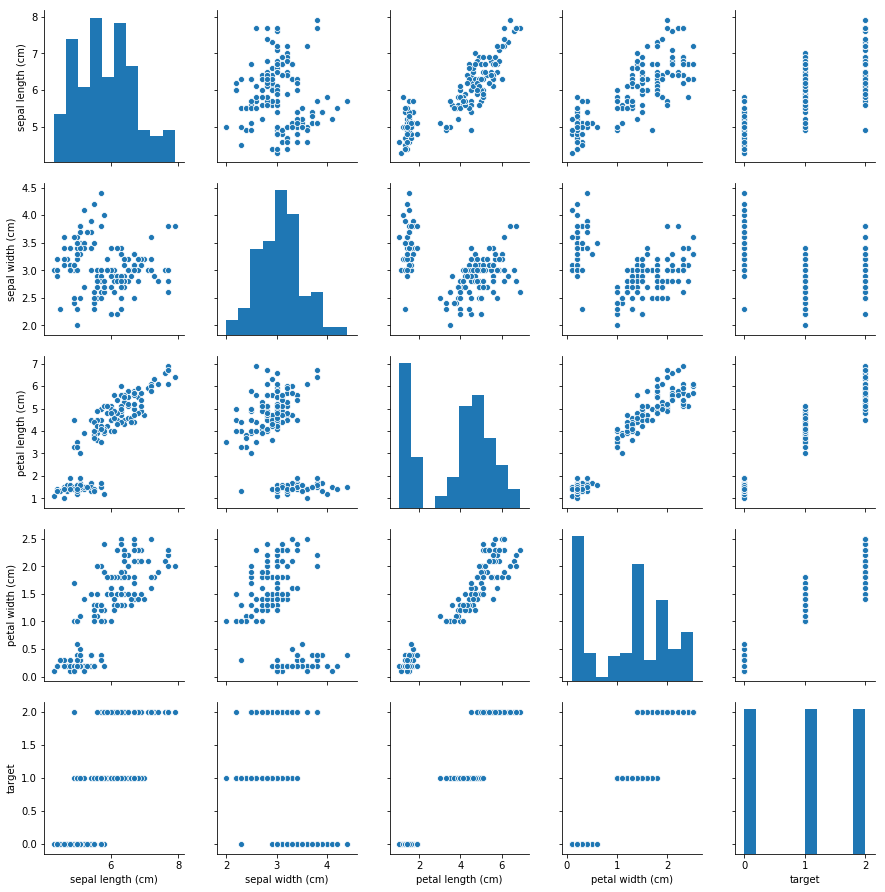

In [23]:
# convert data from 'sklearn.utils.Bunch' object to a pandas DataFrame

# concatenate iris['data'] and iris['target'] arrays;
# columns: concatenate iris['feature_names'] list,
# and string list
data2 = pd.DataFrame(data = np.c_[irisdataset['data'], irisdataset['target']],
                     columns = irisdataset['feature_names'] + ['target'])

# Visualize the data - using pairplots (before doing any supervised learning):
sns.pairplot(data2)
plt.show()

In [24]:
# Split the dataset into 'train' and 'test' sets
## percentage of the data held back for testing (ie. 80% for training, 20% for validation)
validation_size = 0.20
## set 'random_state' to ensure results are reproducible (ie. data is not split into random sets)
seed = 7
train, test, train_labels, test_labels = train_test_split(irisdataset['data'],
                                                          irisdataset['target'],                                                          
                                                          test_size=validation_size,
                                                          random_state=seed)
# Method 1:
## initialize classifier
gnb = GaussianNB()
## train classifier - ie. fit model to training data
model = gnb.fit(train, train_labels)
# make (class) predictions for new/out-of-sample/test data
predictions = gnb.predict(test)
print(predictions)

# Method 2:
## create and fit a nearest-neighbor classifier
knn = KNeighborsClassifier()
knn.fit(train, train_labels)
# make predictions
predictions2 = knn.predict(test)
print(predictions2)

# compare accuracy of the models on the validation set
print(accuracy_score(test_labels, predictions)) # about 83%
print(accuracy_score(test_labels, predictions2))# 90% - of the two (both nonlinear), the nearest-neighbor model is better

[2 1 0 1 1 0 2 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2]
[2 1 0 1 1 0 1 1 0 1 2 1 0 2 0 1 2 2 0 0 1 2 1 1 2 2 1 1 2 2]
0.8333333333333334
0.9
